In [59]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
conn = sqlite3.connect('data\movies.db')

In [61]:
#Print the query dataframe and filter the rows needed
query = pd.read_sql('''SELECT DISTINCT tconst, g.title, i.genres, g.studio,  g.year,
                       t.production_budget, t.worldwide_gross
                       FROM bom_movie_gross as g
                       JOIN imdb_title_basics as i
                       ON g.title = i.primary_title
                       AND g.year = i.start_year
                       JOIN tn_movie_budgets as t
                       ON t.movie = i.primary_title''', conn)
query.head()

,tconst,title,genres,studio,year,production_budget,worldwide_gross
0,tt0435761,Toy Story 3,"Adventure,Animation,Comedy",BV,2010,"$200,000,000","$1,068,879,522"
1,tt1375666,Inception,"Action,Adventure,Sci-Fi",WB,2010,"$160,000,000","$835,524,642"
2,tt0892791,Shrek Forever After,"Adventure,Animation,Comedy",P/DW,2010,"$165,000,000","$756,244,673"
3,tt1325004,The Twilight Saga: Eclipse,"Adventure,Drama,Fantasy",Sum.,2010,"$68,000,000","$706,102,828"
4,tt1228705,Iron Man 2,"Action,Adventure,Sci-Fi",Par.,2010,"$170,000,000","$621,156,389"


In [62]:
#Eliminate all $ and commas from the columns
query['production_budget'] = query['production_budget'].map(lambda x: x.replace(',', ''))
query['production_budget'] = query['production_budget'].map(lambda x: x.replace('$', ''))
query['worldwide_gross'] = query['worldwide_gross'].map(lambda x: x.replace(',', ''))
query['worldwide_gross'] = query['worldwide_gross'].map(lambda x: x.replace('$', ''))

In [63]:
#Convert columns from strings to floats
query.production_budget = query.production_budget.astype(float)
query.worldwide_gross = query.worldwide_gross.astype(float)

In [64]:
#Add 'profit' column to the dataframe
query['profit'] = query['worldwide_gross'] - query['production_budget']

In [65]:
#Top 10 Profitable Films
query = query.sort_values('profit', ascending=False).iloc[:10]
query

,tconst,title,genres,studio,year,production_budget,worldwide_gross,profit
987,tt4154756,Avengers: Infinity War,"Action,Adventure,Sci-Fi",BV,2018,300000000.0,2.048134e+09,1.748134e+09
643,tt0369610,Jurassic World,"Action,Adventure,Sci-Fi",Uni.,2015,215000000.0,1.648855e+09,1.433855e+09
644,tt2820852,Furious 7,"Action,Crime,Thriller",Uni.,2015,190000000.0,1.518723e+09,1.328723e+09
988,tt1825683,Black Panther,"Action,Adventure,Sci-Fi",BV,2018,200000000.0,1.348258e+09,1.148258e+09
989,tt4881806,Jurassic World: Fallen Kingdom,"Action,Adventure,Sci-Fi",Uni.,2018,170000000.0,1.305773e+09,1.135773e+09
407,tt2294629,Frozen,"Adventure,Animation,Comedy",BV,2013,150000000.0,1.272470e+09,1.122470e+09
646,tt2293640,Minions,"Adventure,Animation,Comedy",Uni.,2015,74000000.0,1.160336e+09,1.086336e+09
645,tt2395427,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",BV,2015,330600000.0,1.403014e+09,1.072414e+09
990,tt3606756,Incredibles 2,"Action,Adventure,Animation",BV,2018,200000000.0,1.242521e+09,1.042521e+09
408,tt1300854,Iron Man 3,"Action,Adventure,Sci-Fi",BV,2013,200000000.0,1.215392e+09,1.015392e+09


In [66]:
studio_count = query.groupby('studio')['profit'].count()
studio_count

studio
BV      6
Uni.    4
Name: profit, dtype: int64

In [69]:
studio_profits = query.groupby('studio')['profit'].sum()
studio_profits

studio
BV      7.149189e+09
Uni.    4.984687e+09
Name: profit, dtype: float64

In [70]:
studio_count.index

Index(['BV', 'Uni.'], dtype='object', name='studio')

In [71]:
studio_count.values

array([6, 4], dtype=int64)

<ipython-input-72-14a1c7063ddd>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x.str.replace(' ', '\n'))


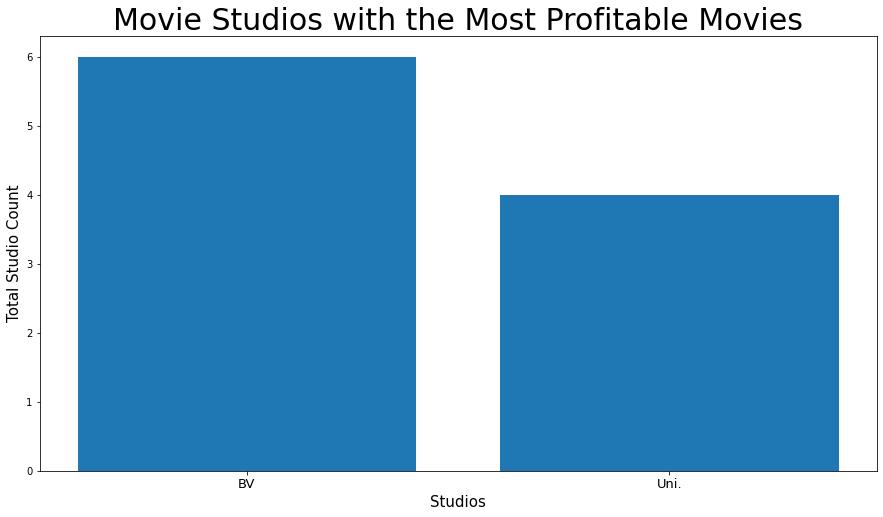

In [72]:
#Create bar chart showing Top 10 Worldwide Profitable Movies
x = studio_count.index
y = studio_count.values

fig, ax = plt.subplots(figsize=(15,8))

ax.bar(x,y)

ax.set_title('Movie Studios with the Most Profitable Movies', fontsize=30)
ax.set_xlabel('Studios', fontsize=15)
ax.set_ylabel('Total Studio Count', fontsize=15)

ax.set_xticklabels(x.str.replace(' ', '\n'))
ax.tick_params(axis='x', labelsize=13)

In [73]:
studio_profits.index

Index(['BV', 'Uni.'], dtype='object', name='studio')

In [74]:
studio_profits.values

array([7.14918928e+09, 4.98468663e+09])

<ipython-input-77-997f8e3529d5>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x.str.replace(' ', '\n'))


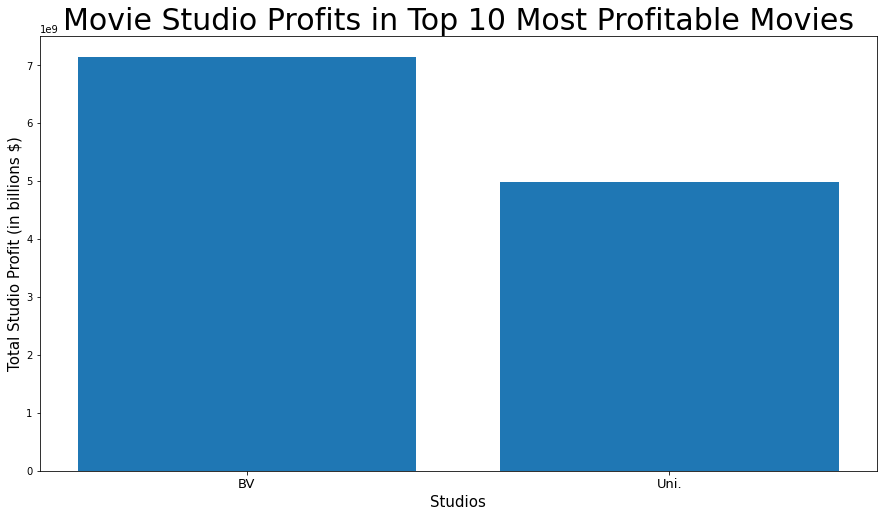

In [77]:
#Create bar chart showing Top 10 Worldwide Profitable Movies
x = studio_profits.index
y = studio_profits.values

fig, ax = plt.subplots(figsize=(15,8))

ax.bar(x,y)

ax.set_title('Movie Studio Profits in Top 10 Most Profitable Movies', fontsize=30)
ax.set_xlabel('Studios', fontsize=15)
ax.set_ylabel('Total Studio Profit (in billions $)', fontsize=15)

ax.set_xticklabels(x.str.replace(' ', '\n'))
ax.tick_params(axis='x', labelsize=13)